In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("covid_19_india.csv")

In [3]:
data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
16845,16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818


In [4]:
data.replace("Bihar****","Bihar",inplace=True)
data.replace("Telengana","Telangana",inplace=True)
data.replace("Dadra and Nagar Haveli and Daman and Diu","Dadra and Nagar Haveli",inplace=True)
data.replace("-",0,inplace=True)

In [5]:
cleaned_data = data[(data["State/UnionTerritory"] != "Unassigned") & (data["State/UnionTerritory"] != "Cases being reassigned to states")]

In [6]:
import datetime 
def Date_int(data):
    a = datetime.datetime.strptime(data,"%Y-%m-%d")
    return(a)

In [7]:
cleaned_data["Date"] = cleaned_data["Date"].apply(Date_int) # converting date type into Datetime format

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3424\374462187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["Date"] = cleaned_data["Date"].apply(Date_int) # converting date type into Datetime format


In [8]:
cleaned_data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
16845,16846,2021-07-07,8:00 AM,Telangana,0,0,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,0,0,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,0,0,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,0,0,1682130,22656,1706818


# List of States and UnionTerritories present in the given report

In [9]:
cleaned_data["State/UnionTerritory"].unique()

array(['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura',
       'Nagaland', 'Meghalaya', 'Dadra and Nagar Haveli', 'Sikkim',
       'Daman & Diu', 'Lakshadweep'], dtype=object)

# Total number of Cases recorded

In [10]:
cleaned_data["Confirmed"].sum() 

4353132348

# Total number of Deaths recorded

In [11]:
cleaned_data["Deaths"].sum() 

58726000

# Total number of Cured cases

In [12]:
cleaned_data["Cured"].sum() #  Total number of Cured cases for all the states

3977194136

# Number of deaths and cured cases in each state

In [13]:
group_data = cleaned_data.groupby("State/UnionTerritory")

In [14]:
total_deaths = group_data.sum()  
total_deaths_by_state = total_deaths[["Deaths"]]
total_deaths_by_state

,Deaths
State/UnionTerritory,
Andaman and Nicobar Islands,22624
Andhra Pradesh,2475816
Arunachal Pradesh,19303
Assam,459575
Bihar,775163
Chandigarh,119356
Chhattisgarh,1591126
Dadra and Nagar Haveli,882
Daman & Diu,0


In [15]:
x_data = total_deaths_by_state.index

In [16]:
y_data = total_deaths_by_state["Deaths"]

In [17]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns

Text(0.5, 1.0, ' Number of Deaths')

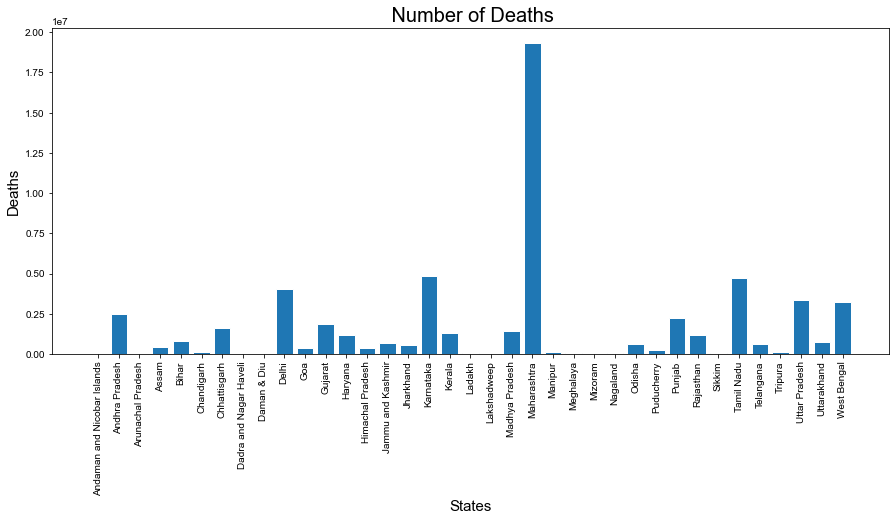

In [19]:
figure = plt.figure(figsize = (15,6))
plt.xticks (rotation=90)
sns.set_style(style="whitegrid")
plt.bar(x_data,y_data)
plt.xlabel("States",size=15)
plt.ylabel("Deaths",size=15)
plt.title(" Number of Deaths",size=20)

#  1e7 is standard scientific notion, and here it indicates an overall scale factor for the y-axis. 
#  That is, if there's a 2 on the y-axis and a 1e7 at the top, 
#  the value at 2 actually indicates 2*1e7 = 2e7 = 2 * 10^7 = 20,000,000 Deaths.

In [20]:
total_cured_by_state = total_deaths[["Cured"]]
total_cured_by_state

,Cured
State/UnionTerritory,
Andaman and Nicobar Islands,1589935
Andhra Pradesh,303427899
Arunachal Pradesh,5150519
Assam,74011348
Bihar,101533848
Chandigarh,7980284
Chhattisgarh,117163544
Dadra and Nagar Haveli,1491338
Daman & Diu,0


In [21]:
cured_x_data = total_cured_by_state.index

In [22]:
cured_y_data = total_cured_by_state["Cured"]

Text(0.5, 1.0, 'Cured cases')

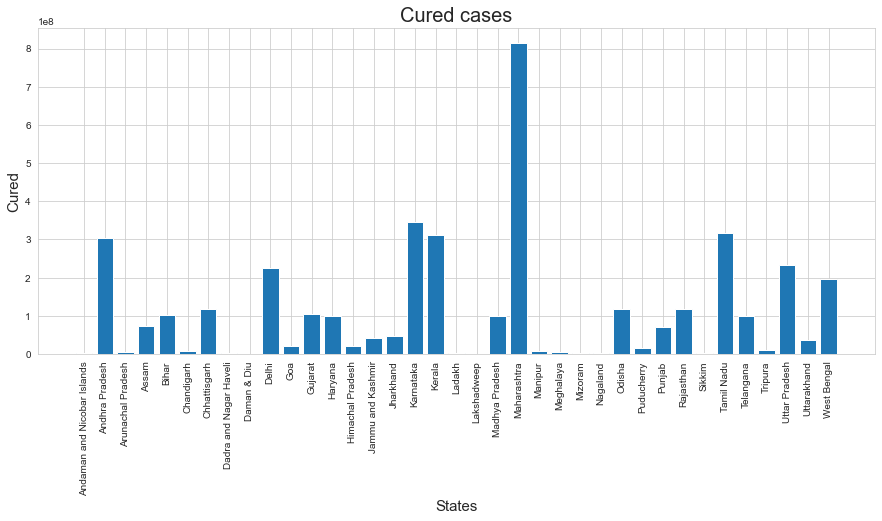

In [23]:
figure = plt.figure(figsize = (15,6))
plt.xticks (rotation=90)
sns.set_style(style="whitegrid")
plt.bar(cured_x_data,cured_y_data)
plt.xlabel("States",size=15)
plt.ylabel("Cured",size=15)
plt.title("Cured cases",size=20)

# Average deaths  in each state

In [24]:
avg_state = group_data.mean() 
avg_state[["Deaths","Cured"]]

,Deaths,Cured
State/UnionTerritory,,
Andaman and Nicobar Islands,48.238806,3.390053e+03
Andhra Pradesh,5125.913043,6.282151e+05
Arunachal Pradesh,41.872017,1.117249e+04
Assam,992.602592,1.598517e+05
Bihar,1638.822410,2.146593e+05
Chandigarh,250.747899,1.676530e+04
Chhattisgarh,3342.701681,2.461419e+05
Dadra and Nagar Haveli,2.060748,3.484435e+03
Daman & Diu,0.000000,0.000000e+00


In [25]:
xx_axis = avg_state.index

In [26]:
import  seaborn as sns

Text(0.5, 1.0, 'State wise Average Deaths ')

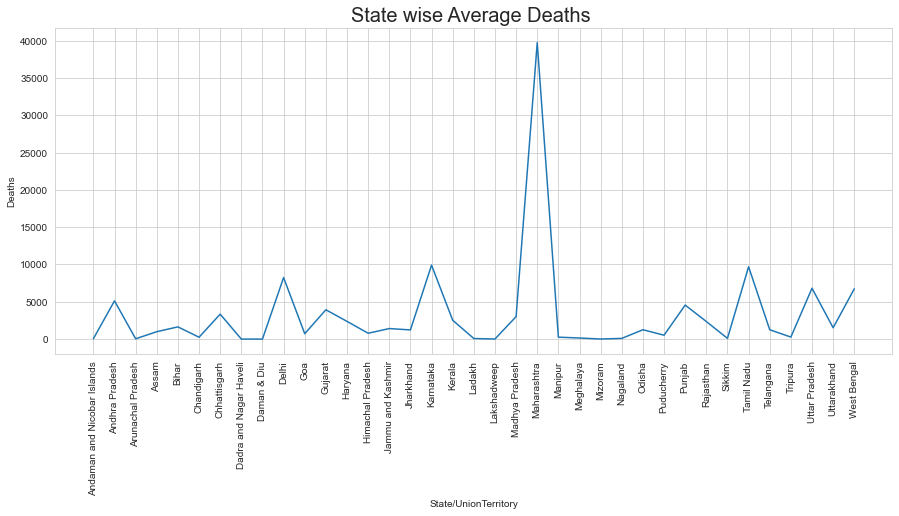

In [27]:
figure = plt.figure(figsize = (15,6))
plt.xticks (rotation=90)
sns.set_style(style="whitegrid")
sns.lineplot(x=xx_axis,y="Deaths",data = avg_state)
plt.title("State wise Average Deaths ",size=20)

Text(0.5, 1.0, 'State wise Average Cured Cases ')

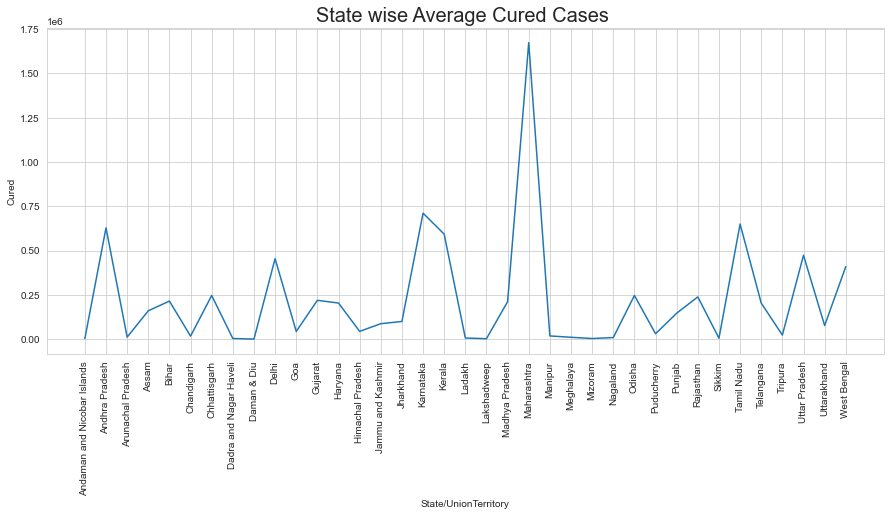

In [28]:
figure = plt.figure(figsize = (15,6))
plt.xticks (rotation=90)
sns.set_style(style="whitegrid")
sns.lineplot(x=xx_axis,y="Cured",data = avg_state)
plt.title("State wise Average Cured Cases ",size=20)

In [29]:
max_deaths_states = group_data.sum() #Top 3 States with highest number of deaths
maxx = max_deaths_states.sort_values("Deaths",ascending=False)
maxx[["Deaths"]].head(3)

,Deaths
State/UnionTerritory,
Maharashtra,19314532
Karnataka,4819018
Tamil Nadu,4731627


In [30]:
maxx[["Deaths"]].tail(5) # states with lowest number of Deaths

,Deaths
State/UnionTerritory,
Arunachal Pradesh,19303
Mizoram,5073
Lakshadweep,2178
Dadra and Nagar Haveli,882
Daman & Diu,0


In [31]:
maxx[["Cured"]].head(3) # top 3 states with highest number of Cured patitents

,Cured
State/UnionTerritory,
Maharashtra,813788907
Karnataka,345648926
Tamil Nadu,317067499


In [32]:
def death_rate_for_all_states(data):                    # Death rate for each state
    ans = (data["Deaths"] / data["Confirmed"])*100
    return(ans)

In [33]:
total_deaths["Death Rate"] = total_deaths.apply(death_rate_for_all_states, axis=1)

In [34]:
total_deaths["Death Rate"]

State/UnionTerritory
Andaman and Nicobar Islands    1.350487
Andhra Pradesh                 0.763795
Arunachal Pradesh              0.344800
Assam                          0.571479
Bihar                          0.715673
Chandigarh                     1.373201
Chhattisgarh                   1.235809
Dadra and Nagar Haveli         0.055557
Daman & Diu                    0.000000
Delhi                          1.716191
Goa                            1.518663
Gujarat                        1.629583
Haryana                        1.086110
Himachal Pradesh               1.613433
Jammu and Kashmir              1.464139
Jharkhand                      1.139244
Karnataka                      1.243305
Kerala                         0.385617
Ladakh                         1.153603
Lakshadweep                    0.387918
Madhya Pradesh                 1.313348
Maharashtra                    2.125062
Manipur                        1.293191
Meghalaya                      1.269722
Mizoram            

Text(0, 0.5, 'Death Rate')

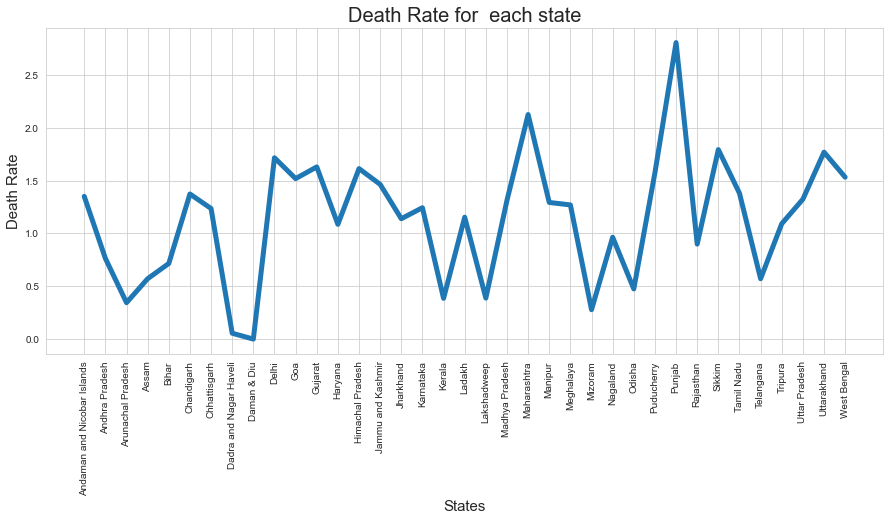

In [35]:
figure = plt.figure(figsize = (15,6))
plt.xticks (rotation=90)
sns.set_style(style="whitegrid")
sns.lineplot(x=xx_axis,y="Death Rate",linewidth = 5,data = total_deaths)
plt.title("Death Rate for  each state",size=20)
plt.xlabel("States" , size=15)
plt.ylabel("Death Rate" , size=15)

In [36]:
def cured_rate_for_all_states(data):                # Cured rate for each state
    ans = (data["Cured"] / data["Confirmed"])*100
    return(ans)

In [37]:
total_deaths["Cured Rate"] = total_deaths.apply(cured_rate_for_all_states, axis=1)

In [38]:
total_deaths["Cured Rate"]

State/UnionTerritory
Andaman and Nicobar Islands    94.907441
Andhra Pradesh                 93.608178
Arunachal Pradesh              92.001088
Assam                          92.032748
Bihar                          93.741623
Chandigarh                     91.813876
Chhattisgarh                   90.999551
Dadra and Nagar Haveli         93.938527
Daman & Diu                     0.000000
Delhi                          94.552060
Goa                            90.771917
Gujarat                        90.779763
Haryana                        93.112045
Himachal Pradesh               89.721649
Jammu and Kashmir              90.181483
Jharkhand                      92.220404
Karnataka                      89.177323
Kerala                         90.360277
Ladakh                         91.475035
Lakshadweep                    84.015396
Madhya Pradesh                 92.141430
Maharashtra                    89.536324
Manipur                        89.188661
Meghalaya                      88.23

Text(0.5, 1.0, 'Cured Rate for  each state')

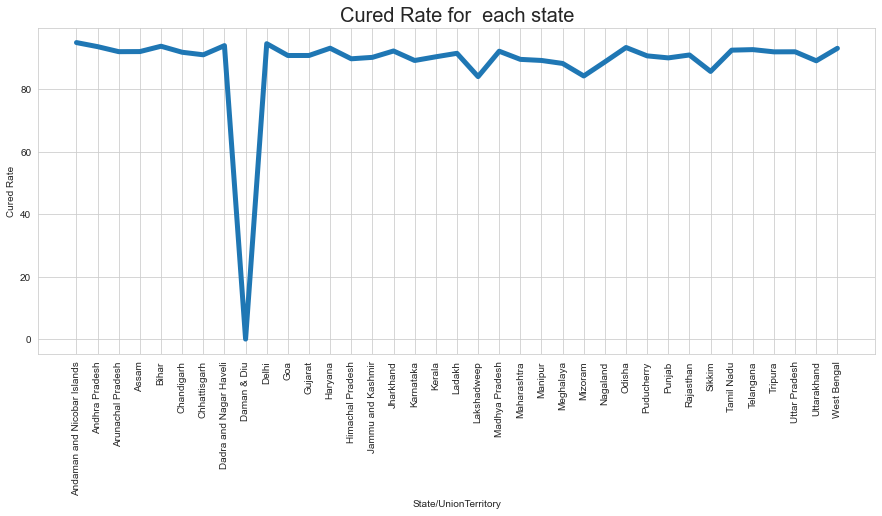

In [39]:
figure = plt.figure(figsize = (15,6))
plt.xticks (rotation=90)
sns.set_style(style="whitegrid")
sns.lineplot(x=xx_axis,y="Cured Rate",linewidth = 5,data = total_deaths)
plt.title("Cured Rate for  each state",size=20)

In [40]:

cured_rate_x = total_deaths.index
cured_rate_y = total_deaths["Cured Rate"]


Text(0.5, 1.0, 'Cured Rate')

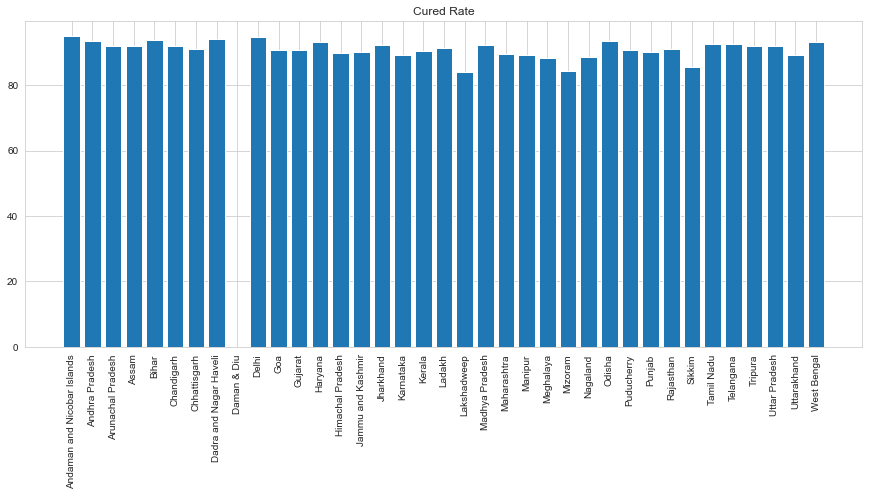

In [41]:
figure = plt.figure(figsize = (15,6))
plt.xticks(rotation=90)
plt.bar(cured_rate_x,cured_rate_y)
plt.title("Cured Rate")

In [42]:
sort_by_death_Rate = total_deaths.sort_values("Death Rate",ascending = False)

In [43]:
top_3 = sort_by_death_Rate.head(3) # top 3 states with highest Death rate
top_3

,Sno,Cured,Deaths,Confirmed,Death Rate,Cured Rate
State/UnionTerritory,,,,,,
Punjab,3984397,71108712,2216735,78999515,2.806011,90.011580
Maharashtra,3981147,813788907,19314532,908892470,2.125062,89.536324
Sikkim,3906107,1983899,41530,2315519,1.793550,85.678373


Text(0, 0.5, 'States')

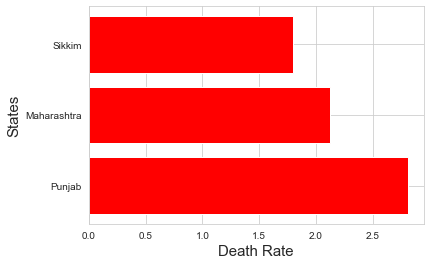

In [44]:
index = top_3.index
drate = top_3["Death Rate"]
plt.barh(index,drate,color = "red")
plt.xlabel("Death Rate",size=15)
plt.ylabel("States",size=15)

In [45]:
sort_by_cured_Rate = total_deaths.sort_values("Cured Rate",ascending = False)

In [46]:
top3_cured = sort_by_cured_Rate.head(3) # top 3 states with highest cured rate
top3_cured

,Sno,Cured,Deaths,Confirmed,Death Rate,Cured Rate
State/UnionTerritory,,,,,,
Andaman and Nicobar Islands,3968892,1589935,22624,1675248,1.350487,94.907441
Delhi,3976047,224062704,4066907,236972842,1.716191,94.552060
Dadra and Nagar Haveli,3931972,1491338,882,1587568,0.055557,93.938527


Text(0, 0.5, 'States')

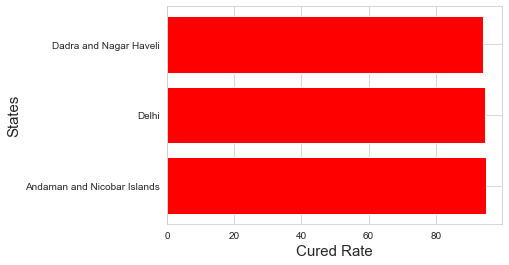

In [47]:
index1 = top3_cured.index
crate = top3_cured["Cured Rate"]
plt.barh(index1,crate,color = "red")
plt.xlabel("Cured Rate",size=15)
plt.ylabel("States",size=15)

In [48]:
group_data[["Date","Deaths"]].max() # Dates for each state when they recorded its maxium deaths

,Date,Deaths
State/UnionTerritory,,
Andaman and Nicobar Islands,2021-07-07,128
Andhra Pradesh,2021-07-07,12898
Arunachal Pradesh,2021-07-07,181
Assam,2021-07-07,4717
Bihar,2021-07-07,9612
Chandigarh,2021-07-07,809
Chhattisgarh,2021-07-07,13462
Dadra and Nagar Haveli,2021-07-07,4
Daman & Diu,2020-06-11,0


In [49]:
def year(data):
    date = data["Date"]
    ans = date.year
    return(ans) 

In [50]:
cleaned_data["Year"] = cleaned_data.apply(year, axis=1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3424\1346147029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["Year"] = cleaned_data.apply(year, axis=1)


In [51]:
def month(data):
    date = data["Date"]
    ans = date.month
    return(ans) 

In [52]:
cleaned_data["Month"] = cleaned_data.apply(month, axis=1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3424\4223157723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["Month"] = cleaned_data.apply(month, axis=1)


In [53]:
cleaned_data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Year,Month
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2020,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2020,2
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2020,2
...,...,...,...,...,...,...,...,...,...,...,...
16845,16846,2021-07-07,8:00 AM,Telangana,0,0,613124,3703,628282,2021,7
16846,16847,2021-07-07,8:00 AM,Tripura,0,0,63964,701,68612,2021,7
16847,16848,2021-07-07,8:00 AM,Uttarakhand,0,0,332006,7338,340882,2021,7
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,0,0,1682130,22656,1706818,2021,7


In [54]:
gr_by_year = cleaned_data.groupby("Year")

In [55]:
gr_by_year_sum = gr_by_year.sum()

In [56]:
gr_by_year_sum

,Sno,Cured,Deaths,Confirmed,Month
Year,,,,,
2020,50635416,941314195,17022508,1073677055,78203
2021,91141272,3035879941,41703492,3279455293,24624


In [57]:
Xaxis = gr_by_year_sum.index
yaxis_d = gr_by_year_sum["Deaths"]
yaxis_cu = gr_by_year_sum["Cured"]
yaxis_co = gr_by_year_sum["Confirmed"]

(array([2019.5 , 2019.75, 2020.  , 2020.25, 2020.5 , 2020.75, 2021.  ,
        2021.25, 2021.5 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

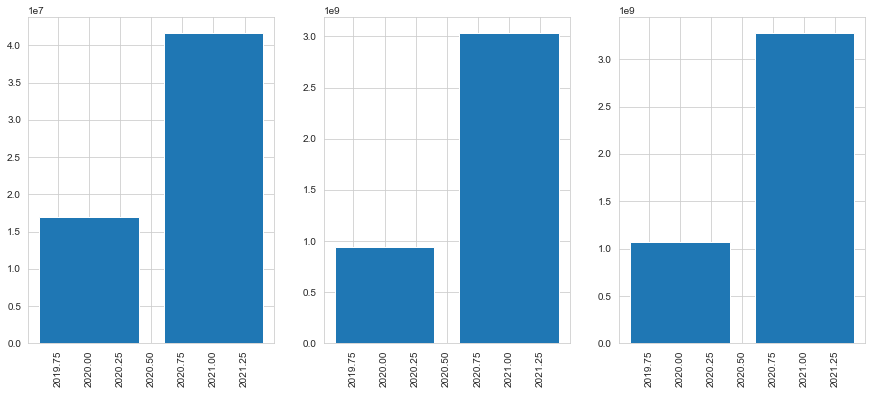

In [58]:
figure = plt.figure(figsize = (15,6))
plt.subplot(1,3,1)
plt.bar(Xaxis,yaxis_d)
plt.xticks (rotation=90)
plt.subplot(1,3,2)
plt.bar(Xaxis,yaxis_cu)
plt.xticks (rotation=90)
plt.subplot(1,3,3)
plt.bar(Xaxis,yaxis_co)
plt.xticks (rotation=90)


In [59]:
data_2020 = gr_by_year_sum.iloc[0] # total number of cured patients,Deaths and total cases from the year 2020
data_2020

Sno            50635416
Cured         941314195
Deaths         17022508
Confirmed    1073677055
Month             78203
Name: 2020, dtype: int64

In [60]:
gr_by_year_sum.iloc[1]  # total number of cured patients,Deaths and total cases from the year 2021

Sno            91141272
Cured        3035879941
Deaths         41703492
Confirmed    3279455293
Month             24624
Name: 2021, dtype: int64

In [61]:
data_2020 = cleaned_data[cleaned_data["Year"] == 2020]

In [62]:
grouped_2020 = data_2020.groupby("Month")

In [63]:
grouped_2020.sum()   #total nummber of deaths,cured and confirmed grouped by month in the year 2020
month_name = grouped_2020.sum() 
month_name.index = ("jan","feb","march","april","may","jun","july","aug","sep","oct","nov","dec")
month_name

,Sno,Cured,Deaths,Confirmed,Year
jan,3,0,0,2,4040
feb,493,0,0,86,58580
march,138659,808,202,9603,1001920
april,952178,75443,13270,422365,1914960
may,2060613,1133341,89834,2900714,2084640
jun,3218683,5668946,319690,10317726,2123020
july,4511955,19980130,793511,31659104,2191700
aug,5695165,58580895,1553468,80749620,2191700
sep,6632325,118592934,2443374,149113758,2121000
oct,8011640,198824412,3457615,226770312,2191700


In [64]:
xaxis_2020 = month_name.index
yaxis_2020 = month_name["Deaths"]
yaxis2_2020 = month_name["Cured"]

Text(0.5, 1.0, 'Deaths occured in each Month of Year 2020')

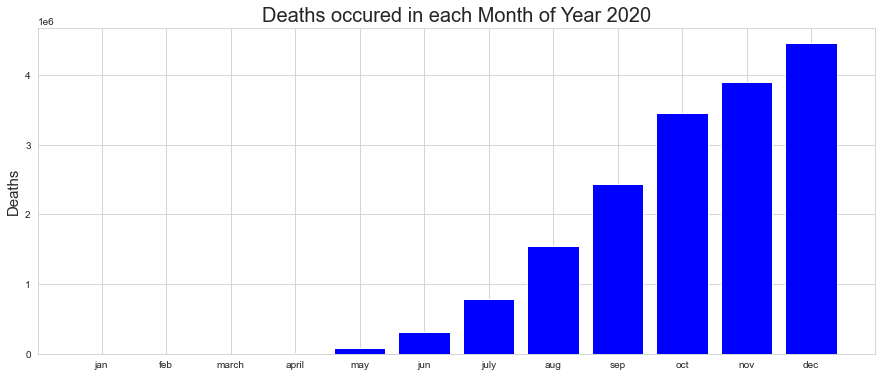

In [65]:
figure = plt.figure(figsize=(15,6))
sns.set_style(style="whitegrid")
plt.bar(xaxis_2020,yaxis_2020,color = "Blue")
plt.ylabel("Deaths",size=15)
plt.title("Deaths occured in each Month of Year 2020",size=20)

Text(0.5, 1.0, 'Cured Cases in each Month of Year 2020')

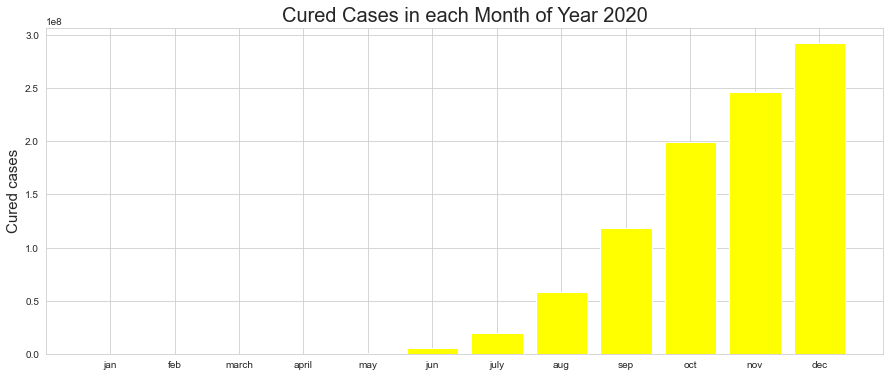

In [66]:
figure = plt.figure(figsize=(15,6))
sns.set_style(style="whitegrid")
plt.bar(xaxis_2020,yaxis2_2020,color = "Yellow")
plt.ylabel("Cured cases",size=15)
plt.title("Cured Cases in each Month of Year 2020",size=20)

In [67]:
data_2021 = cleaned_data[cleaned_data["Year"] == 2021]

In [68]:
grouped_2021 = data_2021.groupby("Month")

In [69]:
grouped_2021.sum()  #total nummber of deaths,cured and confirmed grouped by month in the year 2021
month_name1 = grouped_2021.sum() 
month_name1.index = ("jan","feb","march","april","may","jun","july")
month_name1

,Sno,Cured,Deaths,Confirmed,Year
jan,11874798,315332019,4709167,326469747,2255436
feb,11796120,297133802,4359434,305631803,2037168
march,14245182,342610397,4935253,356305616,2255436
april,14971500,384990190,5340298,440660671,2182680
may,16695918,645106765,8390917,751927486,2255436
jun,17343180,843153433,11155377,884673464,2182680
july,4214574,207553335,2813046,213786506,509292


In [70]:
xaxis_2021 = month_name1.index
yaxis_2021 = month_name1["Deaths"]
yaxis2_2021 = month_name1["Cured"]

Text(0.5, 1.0, 'Deaths occured in each Month of Year 2021')

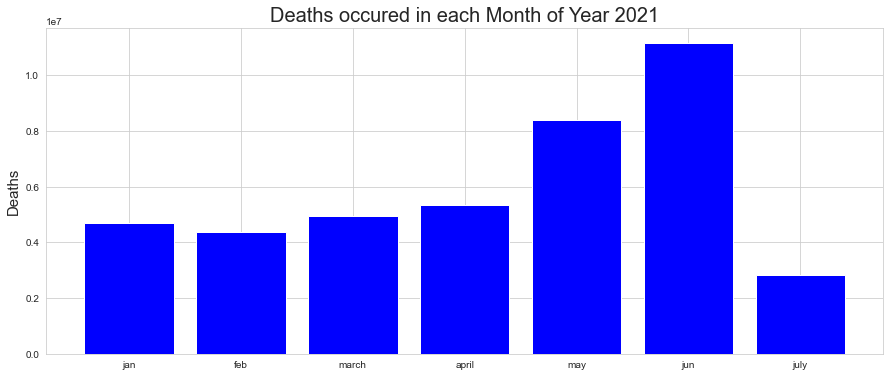

In [71]:
figure = plt.figure(figsize=(15,6))
sns.set_style(style="whitegrid")
plt.bar(xaxis_2021,yaxis_2021,color = "Blue")
plt.ylabel("Deaths",size=15)
plt.title("Deaths occured in each Month of Year 2021",size=20)

Text(0.5, 1.0, 'Cured cases in each Month of Year 2021')

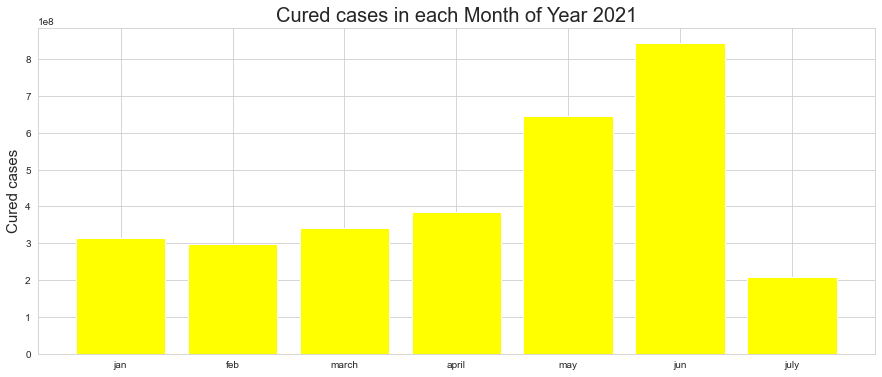

In [72]:
figure = plt.figure(figsize=(15,6))
sns.set_style(style="whitegrid")
plt.bar(xaxis_2021,yaxis2_2021,color = "Yellow")
plt.ylabel("Cured cases",size=15)
plt.title("Cured cases in each Month of Year 2021",size=20)

In [73]:
new_rows = [{"Sno":0,"Cured":0,"Deaths":0,"Confirmed":0,"Year":0},
            {"Sno":0,"Cured":0,"Deaths":0,"Confirmed":0,"Year":0},
            {"Sno":0,"Cured":0,"Deaths":0,"Confirmed":0,"Year":0},
            {"Sno":0,"Cured":0,"Deaths":0,"Confirmed":0,"Year":0},
            {"Sno":0,"Cured":0,"Deaths":0,"Confirmed":0,"Year":0}]

In [74]:
new_2021_data = month_name1.append(new_rows,ignore_index=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3424\2247244676.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_2021_data = month_name1.append(new_rows,ignore_index=True)


In [75]:
new_2021_data.index = ("jan","feb","march","april","may","jun","july","aug","sep","oct","nov","dec")

In [76]:
new_2021_data

,Sno,Cured,Deaths,Confirmed,Year
jan,11874798,315332019,4709167,326469747,2255436
feb,11796120,297133802,4359434,305631803,2037168
march,14245182,342610397,4935253,356305616,2255436
april,14971500,384990190,5340298,440660671,2182680
may,16695918,645106765,8390917,751927486,2255436
jun,17343180,843153433,11155377,884673464,2182680
july,4214574,207553335,2813046,213786506,509292
aug,0,0,0,0,0
sep,0,0,0,0,0
oct,0,0,0,0,0


In [77]:
x_axis_2020 = month_name.index

In [78]:
y_axis_2020 = month_name["Deaths"]

In [79]:
y_axis_2021 = new_2021_data["Deaths"]

Text(0.5, 1.0, 'Comparision of deaths occured in year 2020 & 2021')

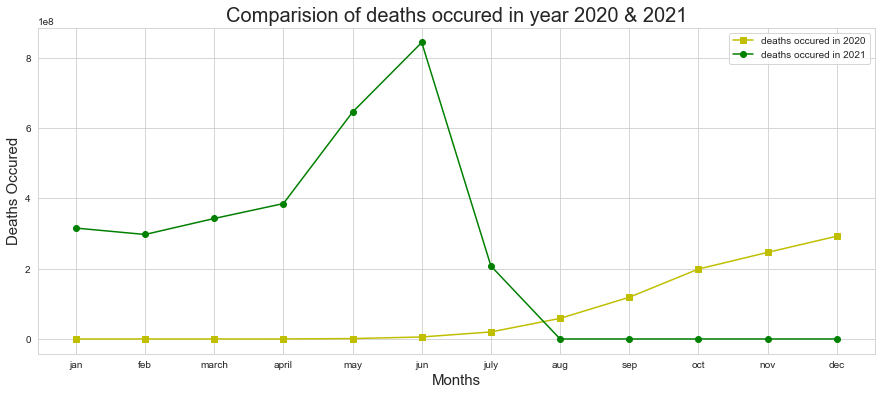

In [103]:
figure = plt.figure(figsize=(15,6))
plt.plot(x_axis_2020,y_axis_2020,"ys-")
plt.plot(x_axis_2020,y_axis_2021,"go-")
plt.legend(["deaths occured in 2020","deaths occured in 2021"],loc = "upper right")
plt.xlabel("Months",size=15)
plt.ylabel("Deaths Occured",size=15)
plt.title("Comparision of deaths occured in year 2020 & 2021",size=20)

In [81]:
y_axis_2020 = month_name["Cured"]
y_axis_2021 = new_2021_data["Cured"]

Text(0.5, 1.0, 'Comparision of cured cases in year 2020 & 2021')

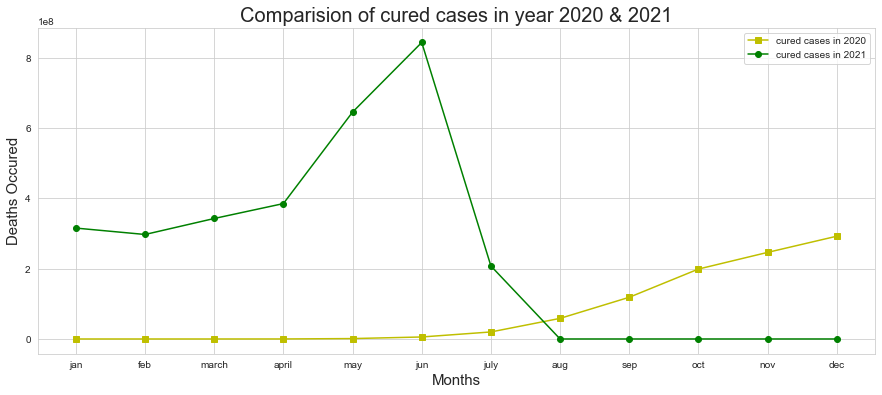

In [82]:
figure = plt.figure(figsize=(15,6))
plt.plot(x_axis_2020,y_axis_2020,"ys-")
plt.plot(x_axis_2020,y_axis_2021,"go-")
plt.legend(["cured cases in 2020","cured cases in 2021"],loc = "upper right")
plt.xlabel("Months",size=15)
plt.ylabel("Deaths Occured",size=15)
plt.title("Comparision of cured cases in year 2020 & 2021",size=20)

In [83]:
cleaned_data[(cleaned_data["Date"] > "2020-01-30") & (cleaned_data["Date"] < "2020-05-03")] 
# to find the cases within a  range of days

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Year,Month
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2020,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2020,2
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2020,2
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3,2020,2
...,...,...,...,...,...,...,...,...,...,...,...
1537,1538,2020-05-02,5:00 PM,Telangana,0,0,441,26,1039,2020,5
1538,1539,2020-05-02,5:00 PM,Tripura,0,0,2,0,2,2020,5
1539,1540,2020-05-02,5:00 PM,Uttarakhand,0,0,36,0,58,2020,5
1540,1541,2020-05-02,5:00 PM,Uttar Pradesh,0,0,654,42,2328,2020,5


In [84]:
group_by_date = data.groupby("Date")
bb = group_by_date.sum()
cc = bb.sort_values("Deaths",ascending = False)
cc.head(1)                                      # on 2021-07-07 they recorded highest number of deaths

,Sno,Cured,Deaths,Confirmed
Date,,,,
2021-07-07,605970,29799534,404211,30663665


In [85]:
dd = cc[cc["Deaths"] == 0] #  Dates when no deaths were recorded
dd.sort_values("Date")

,Sno,Cured,Deaths,Confirmed
Date,,,,
2020-01-30,1,0,0,1
2020-01-31,2,0,0,1
2020-02-01,3,0,0,2
2020-02-02,4,0,0,3
2020-02-03,5,0,0,3
2020-02-04,6,0,0,3
2020-02-05,7,0,0,3
2020-02-06,8,0,0,3
2020-02-07,9,0,0,3


# insights from Maharashtra

In [86]:
Maharashtra = cleaned_data[cleaned_data["State/UnionTerritory"] == "Maharashtra"]
Maharashtra

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Year,Month
76,77,2020-03-09,6:00 PM,Maharashtra,2,0,0,0,2,2020,3
91,92,2020-03-10,6:00 PM,Maharashtra,5,0,0,0,5,2020,3
97,98,2020-03-11,6:00 PM,Maharashtra,2,0,0,0,2,2020,3
120,121,2020-03-12,6:00 PM,Maharashtra,11,0,0,0,11,2020,3
133,134,2020-03-13,6:00 PM,Maharashtra,14,0,0,0,14,2020,3
...,...,...,...,...,...,...,...,...,...,...,...
16690,16691,2021-07-03,8:00 AM,Maharashtra,0,0,5836920,122353,6079352,2021,7
16726,16727,2021-07-04,8:00 AM,Maharashtra,0,0,5845315,122724,6088841,2021,7
16762,16763,2021-07-05,8:00 AM,Maharashtra,0,0,5848693,123030,6098177,2021,7
16798,16799,2021-07-06,8:00 AM,Maharashtra,0,0,5861720,123136,6104917,2021,7


In [87]:
mah_deaths = Maharashtra["Deaths"].sum()

In [88]:
def death_rate(data):
    ans = (data["Deaths"] / data["Confirmed"])*100
    return(ans)

In [89]:
Maharashtra["DeathRate"] = Maharashtra.apply(death_rate,axis=1)
Maharashtra

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3424\3333339325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Maharashtra["DeathRate"] = Maharashtra.apply(death_rate,axis=1)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Year,Month,DeathRate
76,77,2020-03-09,6:00 PM,Maharashtra,2,0,0,0,2,2020,3,0.000000
91,92,2020-03-10,6:00 PM,Maharashtra,5,0,0,0,5,2020,3,0.000000
97,98,2020-03-11,6:00 PM,Maharashtra,2,0,0,0,2,2020,3,0.000000
120,121,2020-03-12,6:00 PM,Maharashtra,11,0,0,0,11,2020,3,0.000000
133,134,2020-03-13,6:00 PM,Maharashtra,14,0,0,0,14,2020,3,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
16690,16691,2021-07-03,8:00 AM,Maharashtra,0,0,5836920,122353,6079352,2021,7,2.012599
16726,16727,2021-07-04,8:00 AM,Maharashtra,0,0,5845315,122724,6088841,2021,7,2.015556
16762,16763,2021-07-05,8:00 AM,Maharashtra,0,0,5848693,123030,6098177,2021,7,2.017488
16798,16799,2021-07-06,8:00 AM,Maharashtra,0,0,5861720,123136,6104917,2021,7,2.016997


In [90]:
Maharashtra_sum = Maharashtra.sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3424\3876384271.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Maharashtra_sum = Maharashtra.sum()


In [91]:
mah_con = Maharashtra_sum["Confirmed"]  # total number of casses recorded in Maharashtra
mah_con

908892470

In [92]:
mah_dea = Maharashtra_sum["Deaths"] #  total number of Deaths recorded in Maharashtra
mah_dea

19314532

In [93]:
mah_ceu = Maharashtra_sum["Cured"] # total number of Cured patients  in Maharashtra
mah_ceu

813788907

In [94]:
mylst = [mah_con,mah_dea,mah_ceu]
mylst

[908892470, 19314532, 813788907]

In [95]:
mah_labels = ["Confirmed cases","Deaths","Cured cases"]

Text(0.5, 1.0, 'Confirmed cases,deaths and cured cases in Maharashtra')

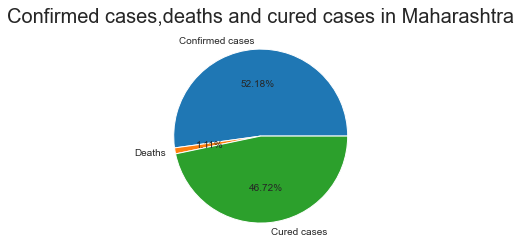

In [96]:
plt.pie(mylst,labels = mah_labels,autopct = "%1.2f%%")
plt.title("Confirmed cases,deaths and cured cases in Maharashtra",size=20)

In [97]:
mah_gr_year = Maharashtra.groupby("Year")

In [98]:
mah_groupedby_year = mah_gr_year.sum()   #  total number of deaths,cured and confirmed cases in the year 2020 and 2021 in Maharashtra
mah_groupedby_year[["Cured","Deaths","Deaths"]]

,Cured,Deaths,Deaths
Year,,,
2020,187034270,6184938,6184938
2021,626754637,13129594,13129594


In [99]:
mah = Maharashtra.groupby("Time")

In [100]:
mah_dates = Maharashtra.groupby("Date")

In [101]:
mah_dates.sum() # records of maharashtra  grouped by dates

,Sno,Cured,Deaths,Confirmed,Year,Month,DeathRate
Date,,,,,,,
2020-03-09,77,0,0,2,2020,3,0.000000
2020-03-10,92,0,0,5,2020,3,0.000000
2020-03-11,98,0,0,2,2020,3,0.000000
2020-03-12,121,0,0,11,2020,3,0.000000
2020-03-13,134,0,0,14,2020,3,0.000000
...,...,...,...,...,...,...,...
2021-07-03,16691,5836920,122353,6079352,2021,7,2.012599
2021-07-04,16727,5845315,122724,6088841,2021,7,2.015556
2021-07-05,16763,5848693,123030,6098177,2021,7,2.017488
